In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from celluloid import Camera
from IPython.display import HTML
from tqdm.notebook import tqdm
import nibabel as nib
from skimage.transform import resize
import os
import random
%matplotlib inline

In [ ]:
root = Path("/content/drive/MyDrive/ARVIS/sourcedata")
label = Path("/content/drive/MyDrive/ARVIS/derivatives/segmentation")

In [ ]:
def change_image_to_label(path):
  parts = list(path.parts)
  parts[parts.index("sourcedata")] = "derivatives"
  parts.insert(-3,"segmentation")

  names = parts[-1].split("_")
  names[-1] = "dseg.nii.gz"
  parts[-1] = "_".join(names)
  return Path(*parts)

In [ ]:
sample_path = list(root.glob("sub*/anat/*flair.nii.gz"))[10]
sample_path_label = change_image_to_label(sample_path)

In [ ]:
sample_path,sample_path_label

(PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-13/anat/sub-13_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/derivatives/segmentation/sub-13/anat/sub-13_dseg.nii.gz'))

In [ ]:
data = nib.load(sample_path)
nib.aff2axcodes(data.affine)

('L', 'P', 'S')

In [ ]:
mri = nib.load(sample_path).get_fdata()
mask = nib.load(sample_path_label).get_fdata().astype(np.uint8)

In [ ]:
np.unique(mask)

array([ 0,  1,  2,  3,  4,  5,  7,  8, 11, 21], dtype=uint8)

In [ ]:
def convert_labels(mask):
    value_mapping = {
      0:0,
      1:0,
      2:0,
      3:0,
      4:0,
      5:0,
      6:0,
      7:1,
      8:1,
      9:1,
      21:1,
      10:0,
      11:0,
      12:0,
      15:0,
      22:0,
    }
    mask = np.vectorize(value_mapping.get)(mask)
    return mask

In [ ]:
converted_mask = convert_labels(mask)
np.unique(converted_mask)

array([0, 1])

In [ ]:
from celluloid import Camera
from IPython.display import HTML

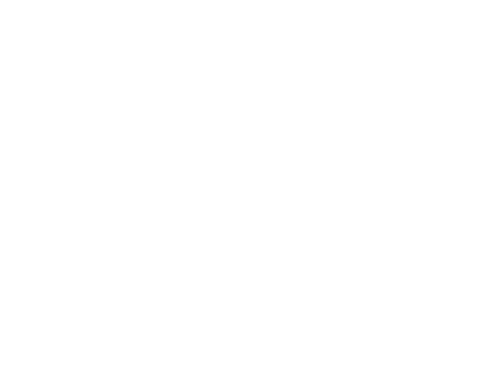

In [ ]:
fig = plt.figure()
camera = Camera(fig)

for i in range(mri.shape[2]):
    plt.imshow(mri[:,:,i], cmap="bone")
    mask_ = np.ma.masked_where(converted_mask[:,:,i]==0, converted_mask[:,:,i])
    plt.imshow(mask_, alpha=0.2, cmap="autumn")
    plt.axis("off")
    camera.snap()
animation = camera.animate()

In [ ]:
HTML(animation.to_html5_video())

(-0.5, 511.5, 399.5, -0.5)

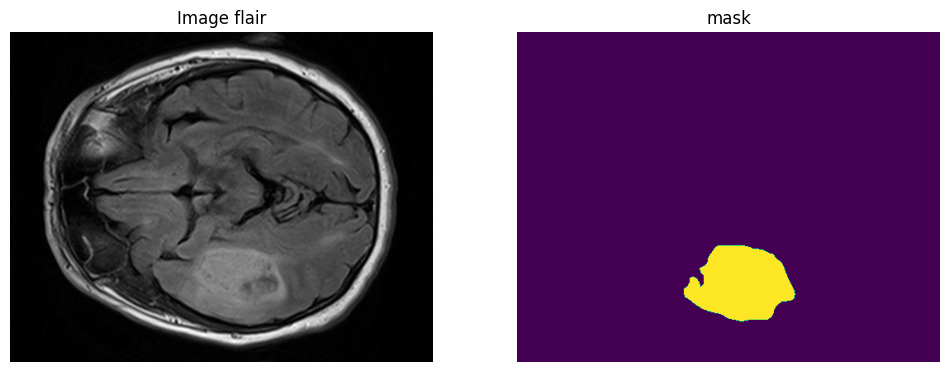

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(mri[:,:,8], cmap='gray')
plt.title('Image flair')
plt.axis("off")
plt.subplot(122)
plt.imshow(converted_mask[:,:,8])
plt.title('mask')
plt.axis("off")

In [ ]:
# Helper functions for normalization and standardization
def normalize(full_volume):
    """
    Z-Normalization of the whole subject
    """
    mu = full_volume.mean()
    std = np.std(full_volume)
    normalized = (full_volume - mu) / std
    return normalized

def standardize(normalized_data):
    """
    Standardize the normalized data into the 0-1 range
    """
    standardized_data = (normalized_data - normalized_data.min()) / (normalized_data.max() - normalized_data.min())
    return standardized_data


In [ ]:
def resize_and_crop(mri,mask):
  #resize full volume to (320,320) and crop it. the last shape will be (256,256)
  new_shape = (320,320,mri.shape[2])
  resized_mri = np.zeros(new_shape,dtype= mri.dtype)
  resized_mask = np.zeros(new_shape,dtype= mask.dtype)
  for slice in range(mri.shape[2]):
    resized_mri[:,:,slice] = resize(mri[:,:,slice],(320,320),anti_aliasing=True)
    resized_mask[:,:,slice] = resize(mask[:,:,slice],(320,320),anti_aliasing=False, order=0)

  cropped_resized_mri = resized_mri[32:-32,32:-32,:]
  cropped_resized_mask = resized_mask[32:-32,32:-32,:]

  return cropped_resized_mri,cropped_resized_mask

In [ ]:
all_files = list(root.glob("sub*/anat/*flair.nii.gz"))[:60]

In [ ]:
len(all_files)

60

In [ ]:
all_files[:10]

[PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-05/anat/sub-05_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-01/anat/sub-01_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-04/anat/sub-04_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-03/anat/sub-03_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-02/anat/sub-02_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-06/anat/sub-06_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-07/anat/sub-07_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-08/anat/sub-08_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-09/anat/sub-09_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-12/anat/sub-12_flair.nii.gz')]

In [ ]:
random.shuffle(all_files)

In [ ]:
all_files[:10]

[PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-47/anat/sub-47_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-33/anat/sub-33_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-58/anat/sub-58_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-07/anat/sub-07_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-04/anat/sub-04_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-49/anat/sub-49_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-27/anat/sub-27_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-36/anat/sub-36_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-54/anat/sub-54_flair.nii.gz'),
 PosixPath('/content/drive/MyDrive/ARVIS/sourcedata/sub-02/anat/sub-02_flair.nii.gz')]

In [ ]:
os.chdir("/content/drive/MyDrive/ARVIS")
if not os.path.isdir("Preprocessed"):
  os.makedirs("Preprocessed")
save_root = Path("Preprocessed")


for counter,path_mri in enumerate(tqdm(all_files)):

  path_label = change_image_to_label(path_mri)
  mri = nib.load(path_mri)
  assert nib.aff2axcodes(mri.affine) == ('L', 'P', 'S')
  mri_data = mri.get_fdata()
  label_data = nib.load(path_label).get_fdata().astype(np.uint8)

  cropped_resized_mri,cropped_resized_label = resize_and_crop(mri_data,label_data)
  normalized_data = normalize(cropped_resized_mri)
  standardize_data = standardize(normalized_data)
  converted_label = convert_labels(cropped_resized_label)

  if counter < 40:
    current_path = save_root/"train"/str(counter)
  elif counter < 55:
    current_path = save_root/"val"/str(counter)
  else:
    current_path = save_root/"test"/str(counter)

  for i in range(standardize_data.shape[2]):
    slice = standardize_data[:,:,i]
    mask = converted_label[:,:,i]

    slice_path = current_path/"data"
    mask_path = current_path/"masks"

    slice_path.mkdir(parents=True,exist_ok=True)
    mask_path.mkdir(parents=True,exist_ok=True)

    np.save(slice_path/str(i),slice)
    np.save(mask_path/str(i),mask)

  0%|          | 0/60 [00:00<?, ?it/s]

In [ ]:
path = Path("/content/drive/MyDrive/ARVIS/Preprocessed/test/57/")
file = "8.npy"
slice_ = np.load(path/"data"/file)
mask_ = np.load(path/"masks"/file)

(-0.5, 255.5, 255.5, -0.5)

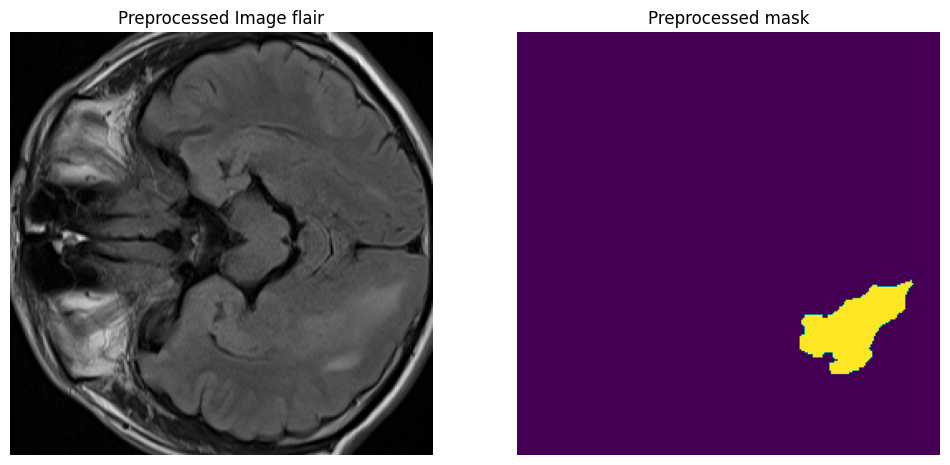

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(slice_, cmap='gray')
plt.title('Preprocessed Image flair')
plt.axis("off")
plt.subplot(122)
plt.imshow(mask_)
plt.title('Preprocessed mask')
plt.axis("off")